In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from mylibs import transform
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [2]:
X,y = sklearn.datasets.load_boston(return_X_y=True)
X = transform.standardize(X)
kfold = KFold(n_splits=5)

In [3]:
erros_mse = np.empty((1,0),dtype = float)
erros_mae = np.empty((1,0),dtype = float)


for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    modelo = linear_model.LinearRegression()
    modelo.fit(Xtrain,y_train)
    y_pred = modelo.predict(Xtest)
    erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    erro_mae = metrics.mean_absolute_error(y_test,y_pred)
    erros_mse = np.append(erros_mse,erro_mse)
    erros_mae = np.append(erros_mae,erro_mae)


print(erros_mse)
print(erros_mae)

print(np.mean(erro_mse))
print(np.mean(erro_mae))

[3.53279637 5.10844425 5.75499399 8.99072043 5.79520109]
[2.62469524 3.91244817 4.38945068 5.57366377 4.78261237]
5.795201088167998
4.782612366965594


In [4]:
erros_mse = np.empty((1,0),dtype = float)
erros_mae = np.empty((1,0),dtype = float)
gradient = linear_model.SGDRegressor()

for idx_train, idx_test in kfold.split(X):
    print("Aqui")
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    gradient.fit(Xtrain,y_train)
    y_pred = gradient.predict(Xtest)
    erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    erro_mae = metrics.mean_absolute_error(y_test,y_pred)
    erros_mse = np.append(erros_mse,erro_mse)
    erros_mae = np.append(erros_mae,erro_mae)


print(erros_mse)
print(erros_mae)

print(np.mean(erro_mse))
print(np.mean(erro_mae))


Aqui
Aqui
Aqui
Aqui
Aqui
[3.08408075 6.45549891 6.06604498 8.80293823 7.18906252]
[2.22071398 4.85758866 4.23880936 5.21338122 5.4003889 ]
7.189062520727749
5.400388900554275


/home/null/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### KNN

In [5]:
erros_mse = np.empty((1,0),dtype = float)
erros_mae = np.empty((1,0),dtype = float)
knn = neighbors.KNeighborsRegressor()

for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    knn.fit(Xtrain,y_train)
    y_pred = knn.predict(Xtest)
    erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    erro_mae = metrics.mean_absolute_error(y_test,y_pred)
    erros_mse = np.append(erros_mse,erro_mse)
    erros_mae = np.append(erros_mae,erro_mae)

print(erros_mse)
print(erros_mae)

print(np.mean(erro_mse))
print(np.mean(erro_mae))

[3.76753937 5.80193925 5.61749953 6.80418508 4.7085286 ]
[2.93764706 3.75623762 4.17465347 4.06851485 3.57425743]
4.708528600758247
3.574257425742574


In [6]:
erros_mse = np.empty((1,0),dtype = float)
erros_mae = np.empty((1,0),dtype = float)
naivebayes = GaussianNB()

for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    naivebayes.fit(Xtrain.astype(float),y_train.astype(int))
    y_pred = naivebayes.predict(Xtest.astype(float))
    erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    erro_mae = metrics.mean_absolute_error(y_test,y_pred)
    erros_mse = np.append(erros_mse,erro_mse)
    erros_mae = np.append(erros_mae,erro_mae)

print(erros_mse)
print(erros_mae)

print(np.mean(erro_mse))
print(np.mean(erro_mae))

[ 5.23636418  6.1821205   9.96697517 10.4351083   6.19088279]
[4.07156863 4.63564356 6.88118812 7.10891089 4.44455446]
6.190882788663528
4.444554455445545


In [7]:
erros_mse = np.empty((1,0),dtype = float)
erros_mae = np.empty((1,0),dtype = float)
svm = svm.SVR()

for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    svm.fit(Xtrain.astype(float),y_train.astype(int))
    y_pred = svm.predict(Xtest.astype(float))
    erro_mse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    erro_mae = metrics.mean_absolute_error(y_test,y_pred)
    erros_mse = np.append(erros_mse,erro_mse)
    erros_mae = np.append(erros_mae,erro_mae)

print(erros_mse)
print(erros_mae)

print(np.mean(erro_mse))
print(np.mean(erro_mae))

[2.89634311 6.85284779 8.85535558 7.57552989 5.70077567]
[2.09855906 4.32743364 6.14518067 4.40433799 4.31927614]
5.7007756662171065
4.319276138322922


#### Melhor modelo (KNN)

In [8]:
knn = neighbors.KNeighborsRegressor()
knn.fit(X,y)
y_pred = knn.predict(X)

print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

3.3672833022994464


### Classificação

In [9]:
X,y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X = transform.normalize(X)
kfold = KFold(n_splits=5)

#### Logistic regression

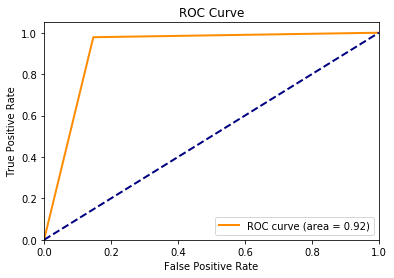

[[58 10]
 [ 1 45]]


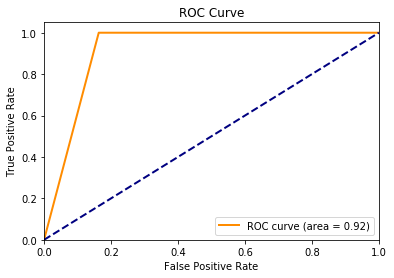

[[41  8]
 [ 0 65]]


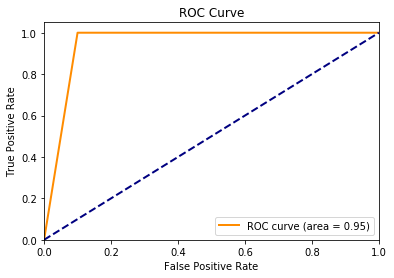

[[36  4]
 [ 0 74]]


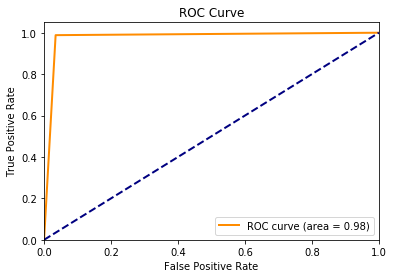

[[28  1]
 [ 1 84]]


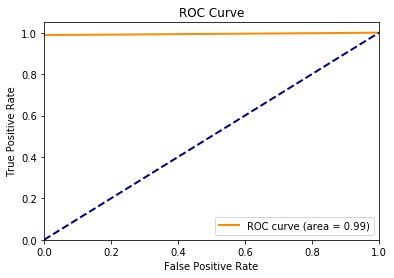

[[26  0]
 [ 1 86]]
0.9910003821618603
0.9543704393727681
0.9291092039843047
0.9578514504482583
0.951019502253675


In [10]:
model = linear_model.LogisticRegression()
recalls = np.empty((1,0),dtype = float)
acuracias = np.empty((1,0),dtype = float)
precisions = np.empty((1,0),dtype = float)
f1s = np.empty((1,0),dtype = float)
aucs = np.empty((1,0),dtype = float)

for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    model.fit(Xtrain,y_train)
    y_pred = model.predict(Xtest)
    acuracia = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    recalls = np.append(recalls,recall)
    acuracias = np.append(acuracias,acuracia)
    precisions = np.append(precisions,precision)
    f1s = np.append(f1s,f1)
    auc = metrics.roc_auc_score(y_test,y_pred)
    aucs = np.append(aucs,auc)
    
    
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)
    roc = metrics.auc(fpr, tpr)
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print(metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))

print(np.mean(recalls))
print(np.mean(acuracias))
print(np.mean(precisions))
print(np.mean(f1s))
print(np.mean(aucs))



### KNN

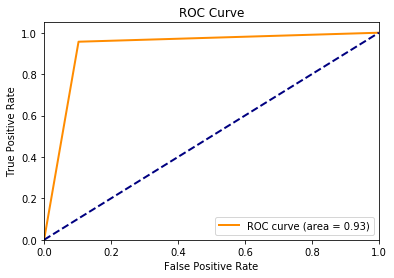

[[61  7]
 [ 2 44]]


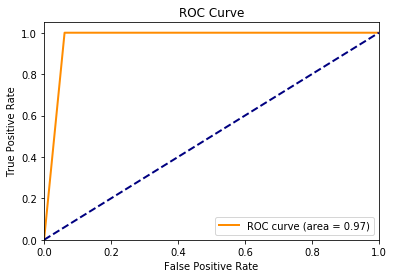

[[46  3]
 [ 0 65]]


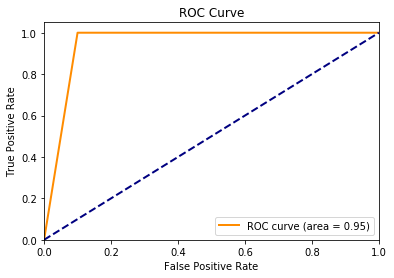

[[36  4]
 [ 0 74]]


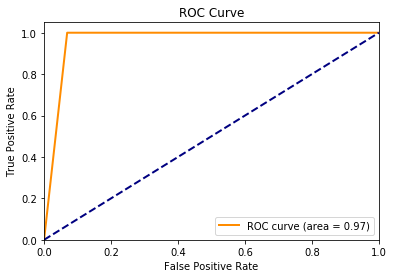

[[27  2]
 [ 0 85]]


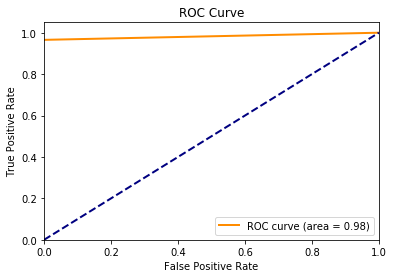

[[26  0]
 [ 3 84]]
0.9844077961019491
0.9631113181183046
0.9488713787902429
0.9658345095536731
0.9588907797001859


In [11]:
model = neighbors.KNeighborsClassifier()

recalls = np.empty((1,0),dtype = float)
acuracias = np.empty((1,0),dtype = float)
precisions = np.empty((1,0),dtype = float)
f1s = np.empty((1,0),dtype = float)
aucs = np.empty((1,0),dtype = float)

for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    model.fit(Xtrain,y_train)
    y_pred = model.predict(Xtest)
    acuracia = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    #Preenchimento de vetores
    recalls = np.append(recalls,recall)
    acuracias = np.append(acuracias,acuracia)
    precisions = np.append(precisions,precision)
    f1s = np.append(f1s,f1)
    auc = metrics.roc_auc_score(y_test,y_pred)
    aucs = np.append(aucs,auc)
    
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)
    roc = metrics.auc(fpr, tpr)
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print(metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))
    
print(np.mean(recalls))
print(np.mean(acuracias))
print(np.mean(precisions))
print(np.mean(f1s))
print(np.mean(aucs))


### Naive bayes

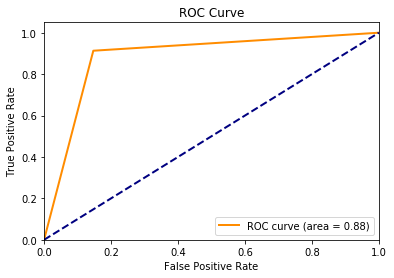

[[58 10]
 [ 4 42]]


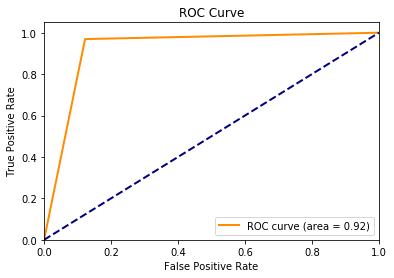

[[43  6]
 [ 2 63]]


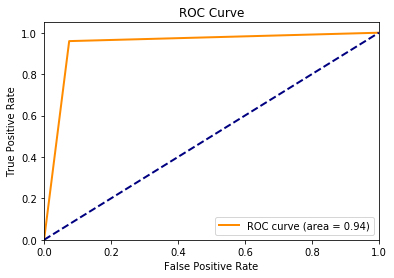

[[37  3]
 [ 3 71]]


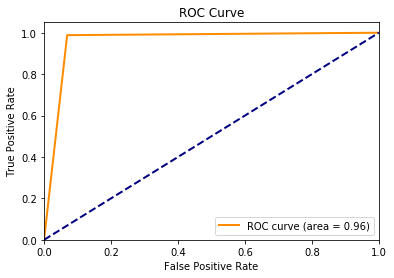

[[27  2]
 [ 1 84]]


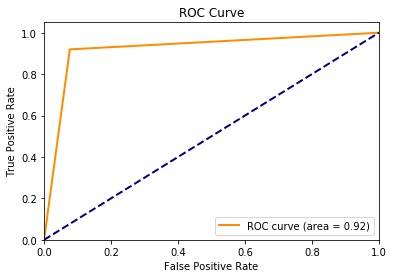

[[24  2]
 [ 7 80]]
0.9499018461907605
0.9296848315478963
0.9265098375113417
0.9372205053092115
0.9259112833668098


In [12]:
model = GaussianNB()
recalls = np.empty((1,0),dtype = float)
acuracias = np.empty((1,0),dtype = float)
precisions = np.empty((1,0),dtype = float)
f1s = np.empty((1,0),dtype = float)
aucs = np.empty((1,0),dtype = float)

for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    model.fit(Xtrain,y_train)
    y_pred = model.predict(Xtest)
    acuracia = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    #Preenchimento de vetores
    recalls = np.append(recalls,recall)
    acuracias = np.append(acuracias,acuracia)
    precisions = np.append(precisions,precision)
    f1s = np.append(f1s,f1)
    auc = metrics.roc_auc_score(y_test,y_pred)
    aucs = np.append(aucs,auc)

    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)
    roc = metrics.auc(fpr, tpr)
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print(metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))

print(np.mean(recalls))
print(np.mean(acuracias))
print(np.mean(precisions))
print(np.mean(f1s))
print(np.mean(aucs))


### SVM

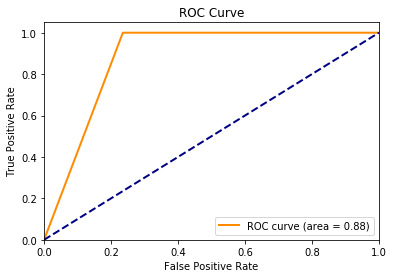

[[52 16]
 [ 0 46]]


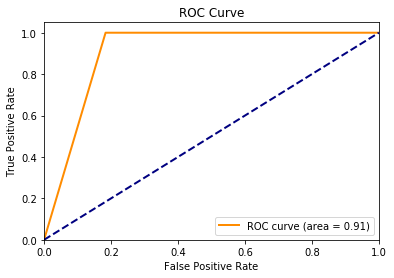

[[40  9]
 [ 0 65]]


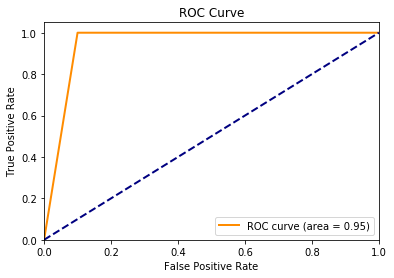

[[36  4]
 [ 0 74]]


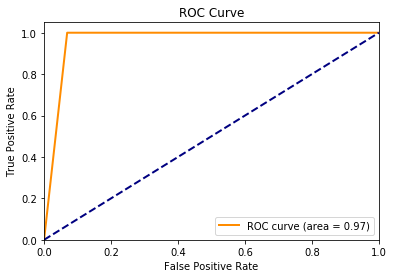

[[27  2]
 [ 0 85]]


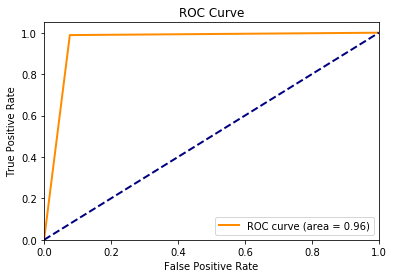

[[24  2]
 [ 1 86]]
0.9977011494252874
0.9403043005744449
0.9046632064985791
0.9464034193639435
0.9323649565927168


In [13]:
model = sklearn.svm.SVC()
recalls = np.empty((1,0),dtype = float)
acuracias = np.empty((1,0),dtype = float)
precisions = np.empty((1,0),dtype = float)
f1s = np.empty((1,0),dtype = float)
aucs = np.empty((1,0),dtype = float)

for idx_train, idx_test in kfold.split(X):
    Xtrain = X[idx_train]
    Xtest = X[idx_test]
    y_train = y[idx_train]
    y_test = y[idx_test]
    model.fit(Xtrain,y_train)
    y_pred = model.predict(Xtest)
    acuracia = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
   
    fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)
    roc = metrics.auc(fpr, tpr)
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    #Preenchimento de vetores
    recalls = np.append(recalls,recall)
    acuracias = np.append(acuracias,acuracia)
    precisions = np.append(precisions,precision)
    f1s = np.append(f1s,f1)
    auc = metrics.roc_auc_score(y_test,y_pred)
    aucs = np.append(aucs,auc)
    
    print(metrics.confusion_matrix(y_test, y_pred, labels=np.unique(y_test)))
    
print(np.mean(recalls))
print(np.mean(acuracias))
print(np.mean(precisions))
print(np.mean(f1s))
print(np.mean(aucs))

##### Melhor modelo

In [14]:
model = neighbors.KNeighborsClassifier()
model.fit(X,y)
y_pred = model.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9789103690685413
